Dropped & Resampled (over + under)

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [65]:
data = pd.read_csv('X_test 0512.csv', usecols=[2,3,4,5,6,7,8,9,10,11])
data.head(10)

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.934383,42,0,38.000000,NaN,2,1,0,0,0
1,0.353590,66,0,0.580712,4800.0,9,0,2,0,0
2,0.024141,68,1,1536.000000,NaN,10,0,1,0,1
3,0.700250,27,0,0.242380,2066.0,4,0,0,0,2
4,0.023778,62,0,0.214561,9600.0,9,0,1,1,0
5,0.162417,65,0,0.491388,6908.0,10,0,2,0,1
6,0.038629,48,0,0.136507,7625.0,8,0,0,0,4
7,0.112231,44,1,0.259409,8900.0,9,0,1,0,2
8,0.138051,48,0,0.071685,15874.0,17,0,0,0,0
9,0.086930,49,2,0.020049,6583.0,17,0,0,0,0


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14584 entries, 0 to 14583
Data columns (total 10 columns):
RevolvingUtilizationOfUnsecuredLines    14584 non-null float64
age                                     14584 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    14584 non-null int64
DebtRatio                               14584 non-null float64
MonthlyIncome                           11988 non-null float64
NumberOfOpenCreditLinesAndLoans         14584 non-null int64
NumberOfTimes90DaysLate                 14584 non-null int64
NumberRealEstateLoansOrLines            14584 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    14584 non-null int64
NumberOfDependents                      14584 non-null int64
dtypes: float64(3), int64(7)
memory usage: 1.1 MB


In [67]:
data.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,14584.000000,14584.000000,14584.000000,14584.000000,11988.000000,14584.000000,14584.000000,14584.000000,14584.000000,14584.000000
mean,5.322765,52.061986,0.244035,335.037005,6673.073991,8.568980,0.091127,1.028456,0.068774,0.757474
std,203.426959,14.578684,0.693149,1459.151664,7619.689000,5.159438,0.496431,1.073491,0.332271,1.103354
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031044,41.000000,0.000000,0.175414,3433.750000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.163248,52.000000,0.000000,0.358594,5417.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.571050,62.000000,0.000000,0.768081,8333.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,18300.000000,101.000000,10.000000,101320.000000,428250.000000,56.000000,13.000000,16.000000,6.000000,8.000000


In [68]:
data['RevolvingUtilizationOfUnsecuredLines'].describe()

count    14584.000000
mean         5.322765
std        203.426959
min          0.000000
25%          0.031044
50%          0.163248
75%          0.571050
max      18300.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

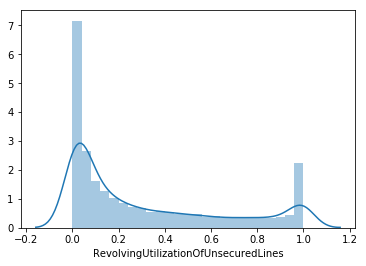

In [69]:
d1=data.loc[data['RevolvingUtilizationOfUnsecuredLines'] <=1]
sns.distplot(d1['RevolvingUtilizationOfUnsecuredLines'])

In [70]:
#X_train['RevolvingUtilizationOfUnsecuredLines'] = X_train['RevolvingUtilizationOfUnsecuredLines'].map(lambda x: np.NaN if x >1 else x)

# Ratio >1 -> 95% quantile
data.loc[data['RevolvingUtilizationOfUnsecuredLines']>1, 'RevolvingUtilizationOfUnsecuredLines']=0.9999998999999999

In [71]:
data['RevolvingUtilizationOfUnsecuredLines'].describe()

count    14584.000000
mean         0.324042
std          0.349679
min          0.000000
25%          0.031044
50%          0.163248
75%          0.571050
max          1.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [72]:
#X_train['RevolvingUtilizationOfUnsecuredLines'].fillna(method='ffill', inplace=True)
#X_train['RevolvingUtilizationOfUnsecuredLines'].describe()

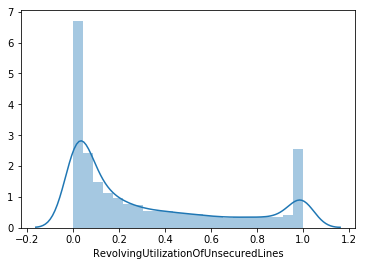

In [73]:
sns.distplot(data['RevolvingUtilizationOfUnsecuredLines'])

In [74]:
data['age'].describe()

count    14584.000000
mean        52.061986
std         14.578684
min         21.000000
25%         41.000000
50%         52.000000
75%         62.000000
max        101.000000
Name: age, dtype: float64

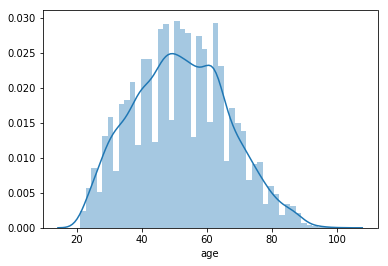

In [75]:
sns.distplot(data['age'])

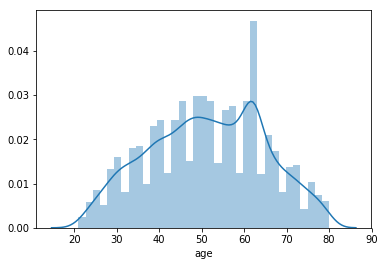

In [76]:
# 25% & 75% of training data
data.loc[data['age']>80, 'age']=62
data.loc[data['age']<18, 'age']=41
sns.distplot(data['age'])

In [77]:
data['age'].describe()

count    14584.000000
mean        51.391662
std         13.524692
min         21.000000
25%         41.000000
50%         52.000000
75%         62.000000
max         80.000000
Name: age, dtype: float64

In [78]:
data['DebtRatio'].describe()

count     14584.000000
mean        335.037005
std        1459.151664
min           0.000000
25%           0.175414
50%           0.358594
75%           0.768081
max      101320.000000
Name: DebtRatio, dtype: float64

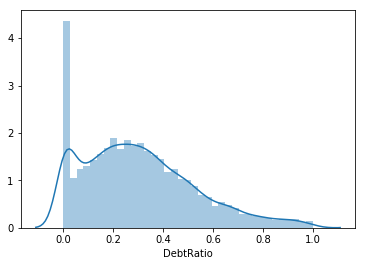

In [79]:
data2=data[data['DebtRatio']<=1]
sns.distplot(data2['DebtRatio'])

In [80]:
d2=data[data['DebtRatio']>1]
d2['DebtRatio'].describe()

count      3173.000000
mean       1538.825869
std        2817.059919
min           1.001087
25%          38.000000
50%         969.000000
75%        2317.000000
max      101320.000000
Name: DebtRatio, dtype: float64

In [81]:
#imp = data['DebtRatio'].quantile(q=0.75)
#print(imp)
#data.loc[data['DebtRatio']>1, 'DebtRatio']= imp

data.loc[data['DebtRatio']>1, 'DebtRatio']= np.NaN
#data['DebtRatio'].fillna(method='ffill', inplace=True)
data['DebtRatio'].ffill(inplace=True)
data['DebtRatio'].describe()

count    14583.000000
mean         0.306105
std          0.224612
min          0.000000
25%          0.132760
50%          0.278922
75%          0.442522
max          1.000000
Name: DebtRatio, dtype: float64

In [82]:
#sns.distplot(data['DebtRatio'])

In [83]:
data['NumberOfOpenCreditLinesAndLoans'].describe()

count    14584.000000
mean         8.568980
std          5.159438
min          0.000000
25%          5.000000
50%          8.000000
75%         11.000000
max         56.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

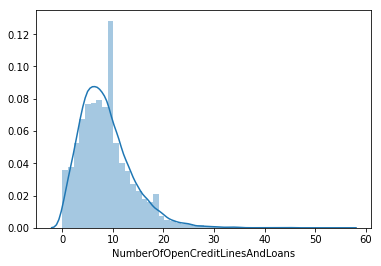

In [84]:
sns.distplot(data['NumberOfOpenCreditLinesAndLoans'])

In [85]:
data.loc[data['NumberOfOpenCreditLinesAndLoans']>20, 'NumberOfOpenCreditLinesAndLoans']= 18
data['NumberOfOpenCreditLinesAndLoans'].describe()

count    14584.000000
mean         8.390085
std          4.627270
min          0.000000
25%          5.000000
50%          8.000000
75%         11.000000
max         20.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

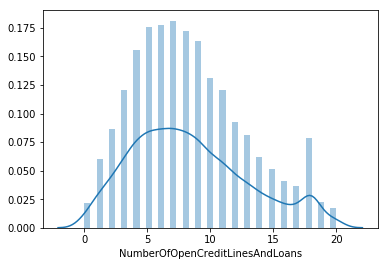

In [86]:
sns.distplot(data['NumberOfOpenCreditLinesAndLoans'])

In [87]:
data['MonthlyIncome'].describe()

count     11988.000000
mean       6673.073991
std        7619.689000
min           0.000000
25%        3433.750000
50%        5417.000000
75%        8333.000000
max      428250.000000
Name: MonthlyIncome, dtype: float64

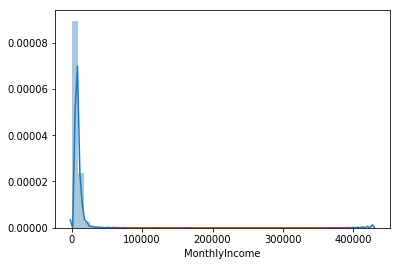

In [88]:
sns.distplot(data['MonthlyIncome'].dropna())

In [90]:
len(data[data['MonthlyIncome']<1000])

451

In [91]:
data.loc[data['MonthlyIncome']<1000, 'MonthlyIncome']=1300
data['MonthlyIncome'].describe()

count     11988.000000
mean       6708.512513
std        7592.038658
min        1000.000000
25%        3433.750000
50%        5417.000000
75%        8333.000000
max      428250.000000
Name: MonthlyIncome, dtype: float64

In [92]:
len(data[data['MonthlyIncome']>20000])

236

In [93]:
data.loc[data['MonthlyIncome']>20000, 'MonthlyIncome']=14583
data['MonthlyIncome'].describe()

count    11988.000000
mean      6262.087838
std       3809.124140
min       1000.000000
25%       3433.750000
50%       5417.000000
75%       8333.000000
max      20000.000000
Name: MonthlyIncome, dtype: float64

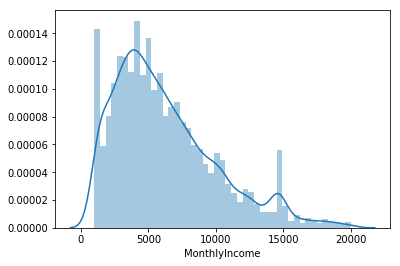

In [95]:
sns.distplot(data['MonthlyIncome'].dropna())

In [96]:
data['MonthlyIncome'].fillna(method='ffill', inplace=True)
data['MonthlyIncome'].describe()

count    14583.000000
mean      6302.277515
std       3826.486091
min       1000.000000
25%       3467.000000
50%       5481.000000
75%       8377.000000
max      20000.000000
Name: MonthlyIncome, dtype: float64

In [40]:
#sns.distplot(X_train['MonthlyIncome'])

In [97]:
data['NumberRealEstateLoansOrLines'].describe()

count    14584.000000
mean         1.028456
std          1.073491
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

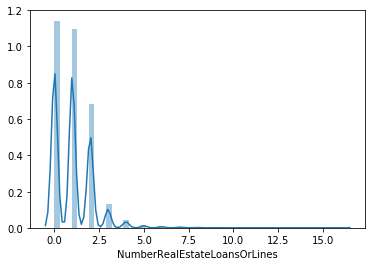

In [98]:
sns.distplot(data['NumberRealEstateLoansOrLines'])

In [99]:
data.loc[data['NumberRealEstateLoansOrLines']>4, 'NumberRealEstateLoansOrLines']= 3.0
data['NumberRealEstateLoansOrLines'].describe()

count    14584.000000
mean         0.998560
std          0.958115
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

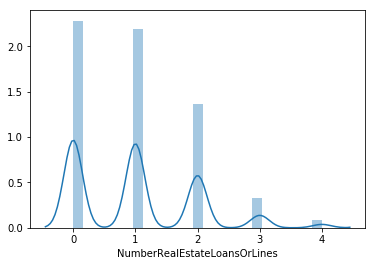

In [100]:
sns.distplot(data['NumberRealEstateLoansOrLines'])

In [101]:
data['NumberOfDependents'].describe()

count    14584.000000
mean         0.757474
std          1.103354
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          8.000000
Name: NumberOfDependents, dtype: float64

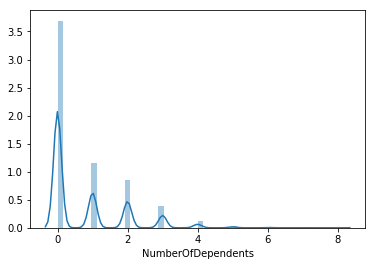

In [102]:
sns.distplot(data['NumberOfDependents'])

In [103]:
data.loc[data['NumberOfDependents']>5, 'NumberOfDependents']= 3

In [104]:
data['NumberOfDependents'].describe()

count    14584.000000
mean         0.751234
std          1.081011
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: NumberOfDependents, dtype: float64

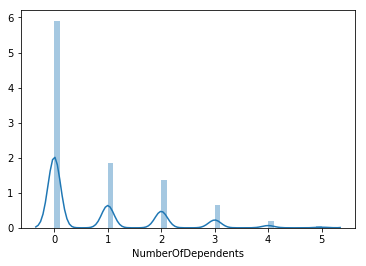

In [105]:
sns.distplot(data['NumberOfDependents'])

In [106]:
data.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,14584.000000,14584.000000,14584.000000,14583.000000,14583.000000,14584.000000,14584.000000,14584.000000,14584.000000,14584.000000
mean,0.324042,51.391662,0.244035,0.306105,6302.277515,8.390085,0.091127,0.998560,0.068774,0.751234
std,0.349679,13.524692,0.693149,0.224612,3826.486091,4.627270,0.496431,0.958115,0.332271,1.081011
min,0.000000,21.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031044,41.000000,0.000000,0.132760,3467.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.163248,52.000000,0.000000,0.278922,5481.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.571050,62.000000,0.000000,0.442522,8377.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,80.000000,10.000000,1.000000,20000.000000,20.000000,13.000000,4.000000,6.000000,5.000000


In [51]:
#from fancyimpute import KNN 
#fancy impute removes column names.
#train_cols = list(train)
# Use 5 nearest rows which have a feature to fill in each row's
# missing features
#X_train_filled_knn = KNN(k=5).complete(X_train)
#X_filled_knn = KNN(k=3).fit_transform(X_train)    


In [111]:
y_test = pd.read_csv('y_test 0512.csv', usecols=[1])
cleaned = pd.concat([data, y_test],axis = 1)
dr = cleaned.dropna(axis=0)
dr.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,1
count,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000
mean,0.324012,51.392539,0.244068,0.306124,6302.366822,8.390824,0.091071,0.998697,0.068783,0.751269,0.066452
std,0.349664,13.525367,0.693191,0.224608,3826.602105,4.627142,0.496408,0.958109,0.332293,1.081065,0.249079
min,0.000000,21.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031043,41.000000,0.000000,0.132814,3467.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.163248,52.000000,0.000000,0.278950,5481.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.570958,62.000000,0.000000,0.442522,8378.000000,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000
max,1.000000,80.000000,10.000000,1.000000,20000.000000,20.000000,13.000000,4.000000,6.000000,5.000000,1.000000


In [112]:
y_test = dr['1']
y_test.describe()

count    14582.000000
mean         0.066452
std          0.249079
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: 1, dtype: float64

In [113]:
X_test = dr.drop('1', axis=1)
X_test.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000
mean,0.324012,51.392539,0.244068,0.306124,6302.366822,8.390824,0.091071,0.998697,0.068783,0.751269
std,0.349664,13.525367,0.693191,0.224608,3826.602105,4.627142,0.496408,0.958109,0.332293,1.081065
min,0.000000,21.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031043,41.000000,0.000000,0.132814,3467.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.163248,52.000000,0.000000,0.278950,5481.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.570958,62.000000,0.000000,0.442522,8378.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,80.000000,10.000000,1.000000,20000.000000,20.000000,13.000000,4.000000,6.000000,5.000000


In [114]:
X_test.to_csv('X_test 0513 cleaned.csv')
y_test.to_csv('y_test 0513 cleaned.csv')

/data/huangqi/anaconda3/envs/ba/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


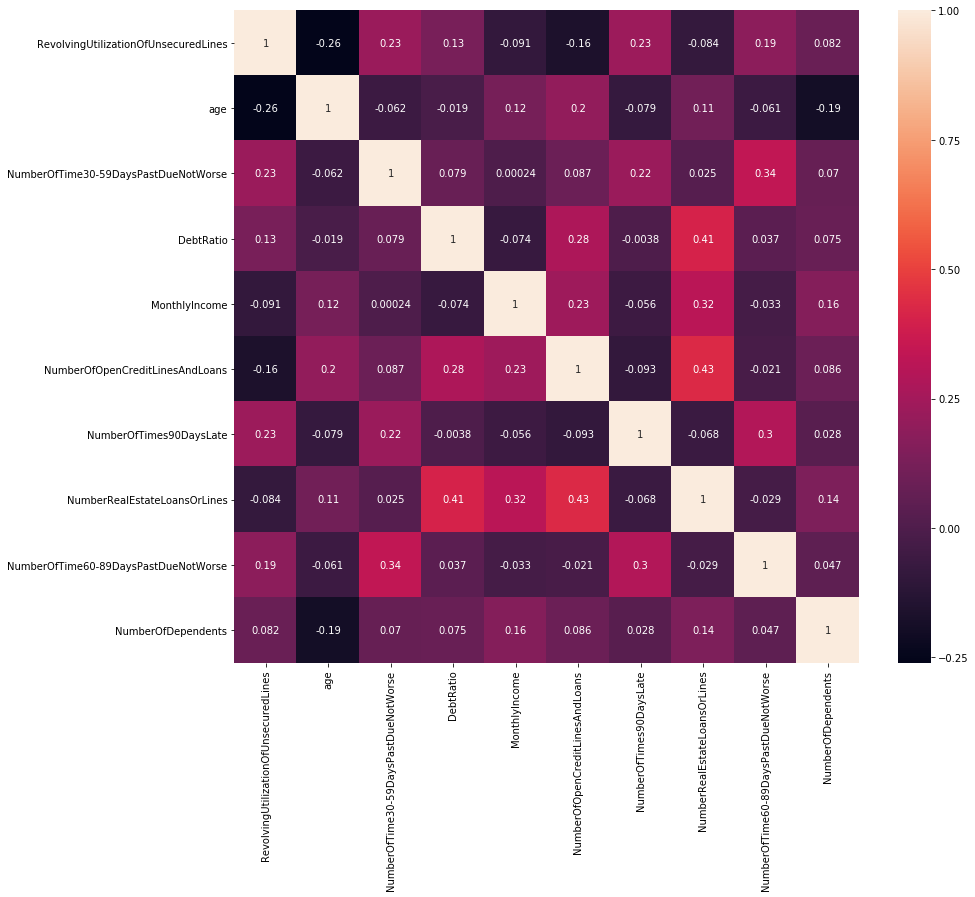

In [116]:
corr = X_test.corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr, annot=True, fmt=".2g")

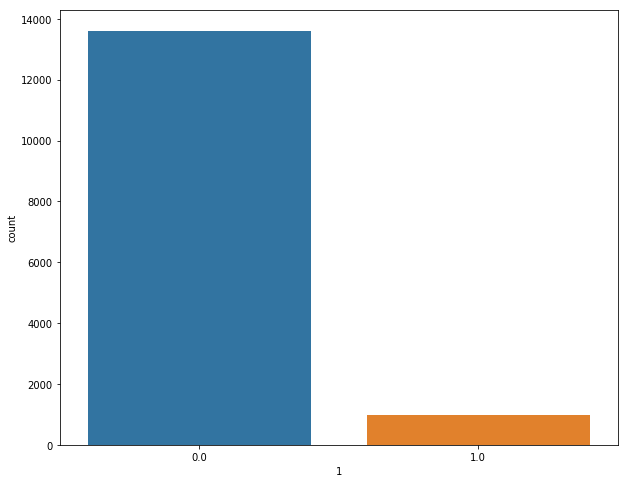

In [117]:
plt.figure(figsize=(10,8))
sns.countplot("1", data=dr)

In [118]:
print(np.bincount(y_test))

[13613   969]
